# Понижение размерности
## Цель работы
Ознакомиться с основными методами понижения размерности, изучить их применение на практике, сравнить эффективность разных методов и визуализировать результаты.

## Содержание работы
1. Сгенерируйте синтетический двумерный датасет с высокой степенью корреляции между признаками.
2. Понизьте размерность датасета до одной при помощи метода PCA и визуализируйте его до и после.
3. Примените метод главных компонент на более многомерных данных. Визуализируйте две главные компоненты.
4. Выберите оптимальное количество главных компонент по методу локтя.
5. Сгенерируйте двумерный датасет для классификации и примените на нем метод линейного дискриминантного анализа.
6. Сгенерируйте двумерный датасет для классификации и примените на нем метод понижения размерности t-SNE.
7. Сгенерируйте линейно неразделимый двумерный датасет для классификации и опробуйте на нем метод KernelPCA с различными ядрами.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерируйте синтетический двумерный датасет с высокой степенью корреляции между признаками.

In [2]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

<Axes: >

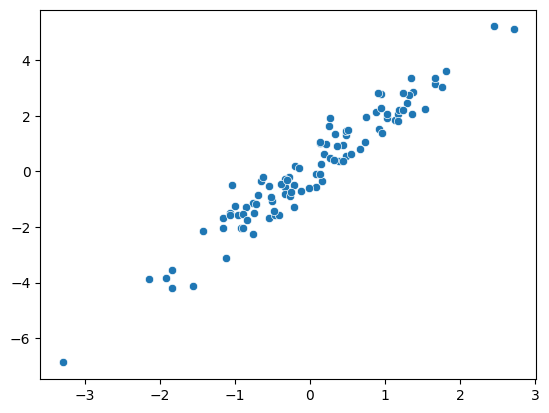

In [3]:
sns.scatterplot(x=x, y=y)

### 2. Понизьте размерность датасета до одной при помощи метода PCA и визуализируйте его до и после.

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

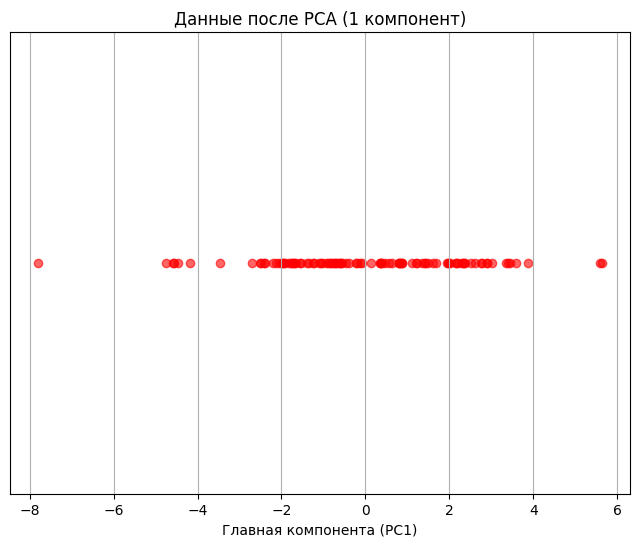

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca, np.zeros_like(X_pca), color='red', alpha=0.6)  # Отложение по оси X, Y = 0
plt.title('Данные после PCA (1 компонент)')
plt.xlabel('Главная компонента (PC1)')
plt.yticks([])  # Убираем метки по оси Y
plt.grid()
plt.show()

In [7]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.43760425 0.89916768]]
Объясненная дисперсия: [0.98948409]


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

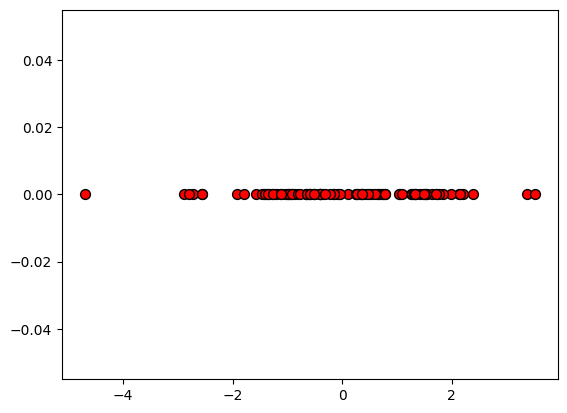

In [11]:
plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

### 3. Примените метод главных компонент на более многомерных данных. Визуализируйте две главные компоненты.

In [12]:
from sklearn.datasets import load_breast_cancer


In [13]:
data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

In [16]:
df_temp = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

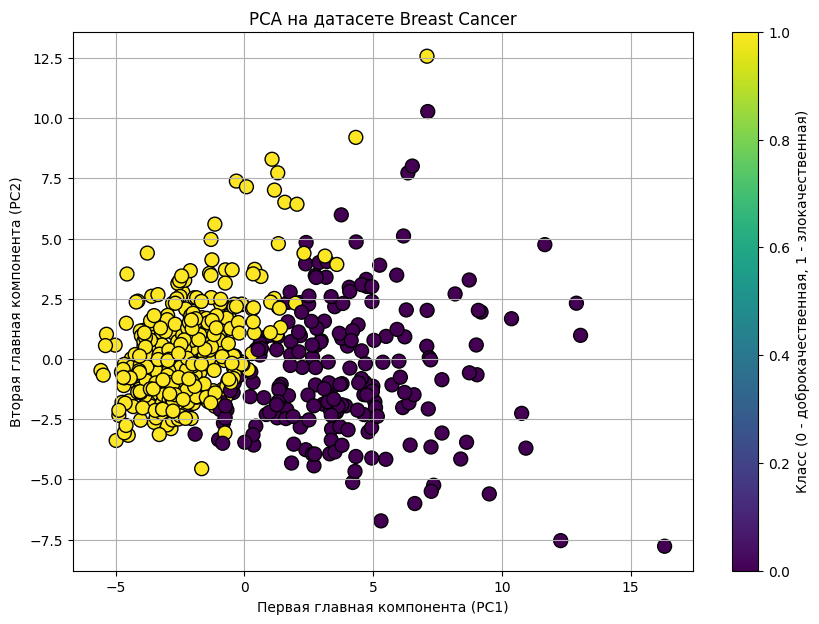

In [17]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_temp['PC1'], df_temp['PC2'], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA на датасете Breast Cancer')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(scatter, label='Класс (0 - доброкачественная, 1 - злокачественная)')
plt.grid()
plt.show()

In [18]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [19]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


### 4. Выберите оптимальное количество главных компонент по методу локтя.

In [20]:
n_components_range = range(1, 31)
explained_variance = []

In [21]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

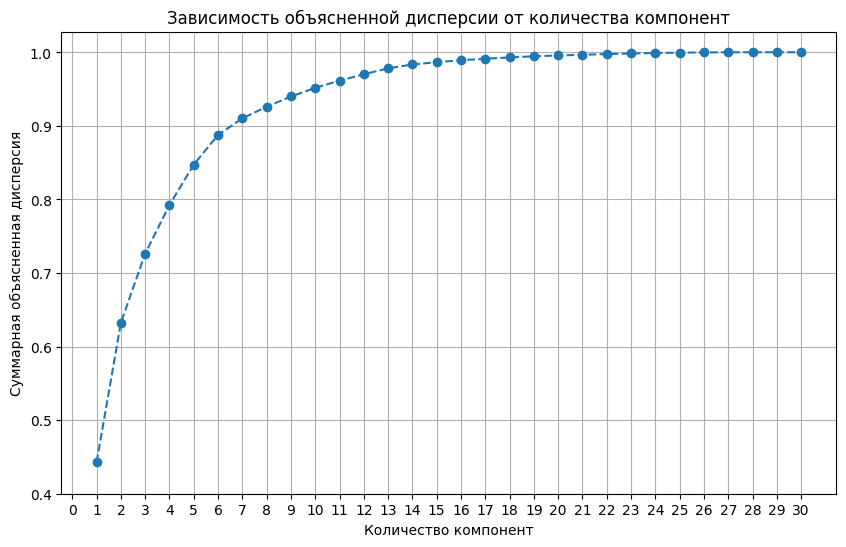

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance, marker='o', linestyle='--')
plt.title('Зависимость объясненной дисперсии от количества компонент')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объясненная дисперсия')
plt.grid()
plt.xticks(np.arange(0, 31, 1))  # Подписи по оси X
plt.yticks(np.arange(0.4, 1.1, 0.1))  # Подписи по оси Y
plt.show()

In [23]:
pca = PCA(n_components=15)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783]
Суммарная объясненная дисперсия: 0.99


In [24]:
df_temp_1 = pd.DataFrame(data=X_pca)

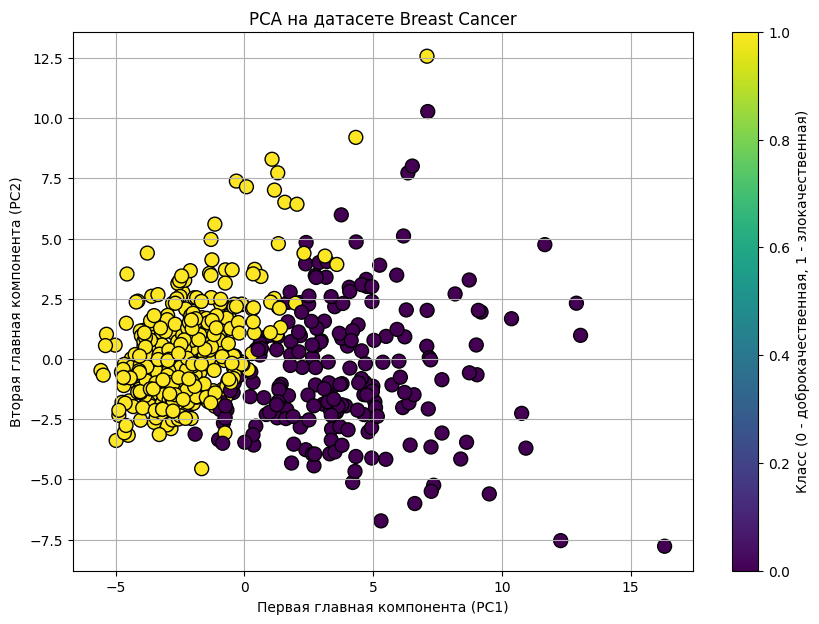

In [25]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_temp_1[0], df_temp_1[1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA на датасете Breast Cancer')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(scatter, label='Класс (0 - доброкачественная, 1 - злокачественная)')
plt.grid()
plt.show()

### 5. Сгенерируйте двумерный датасет для классификации и примените на нем метод линейного дискриминантного анализа. (LDA)

Принимает во внимание значение целевой переменной

In [26]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

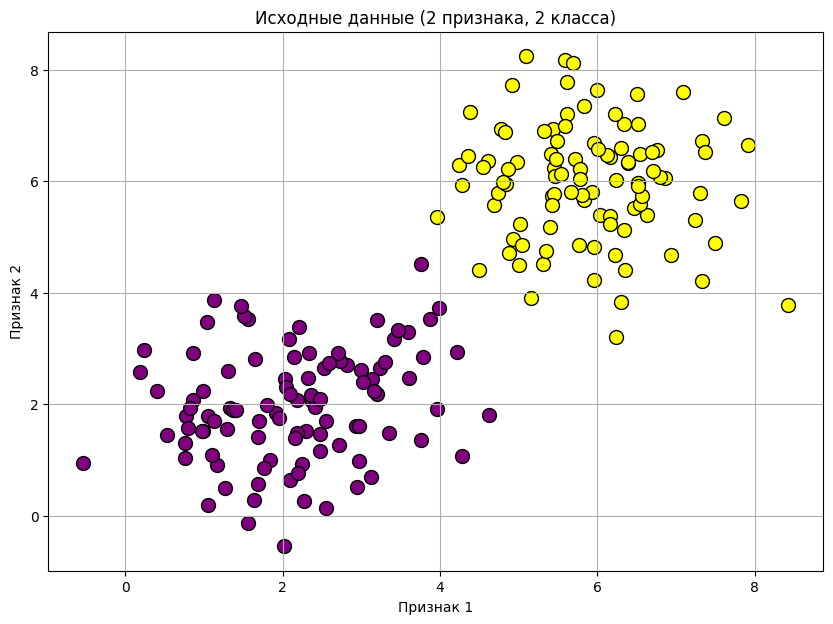

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='purple', edgecolor='k', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='yellow', edgecolor='k', s=100)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Исходные данные (2 признака, 2 класса)')
plt.grid(True)
plt.show()

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

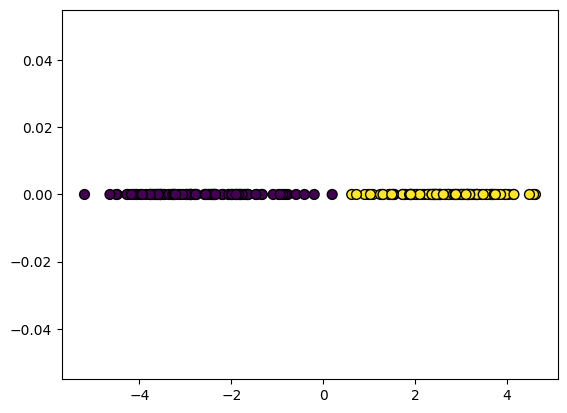

In [31]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, edgecolor='k', s=50)

In [32]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[7.59579267 8.15669759]]


### 6. Сгенерируйте двумерный датасет для классификации и примените на нем метод понижения размерности t-SNE.

In [33]:
from sklearn.manifold import TSNE

In [34]:
tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

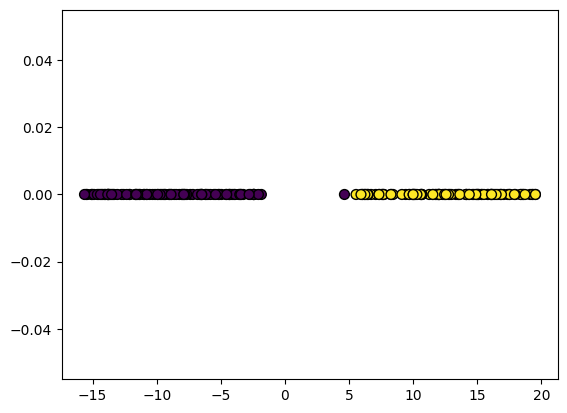

In [35]:
plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, edgecolor='k', s=50)

In [36]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

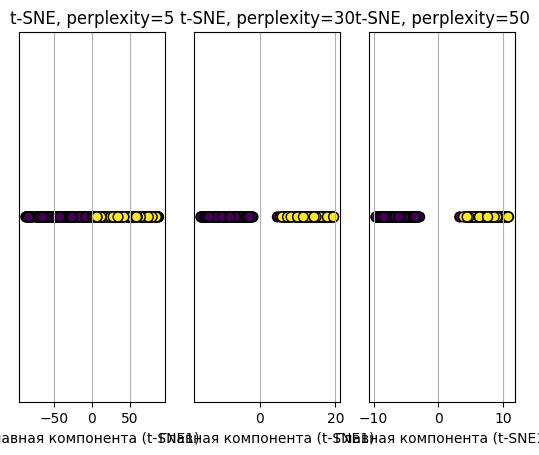

In [37]:
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

### 7. Сгенерируйте линейно неразделимый двумерный датасет для классификации и опробуйте на нем метод KernelPCA с различными ядрами.

In [38]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

In [39]:
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

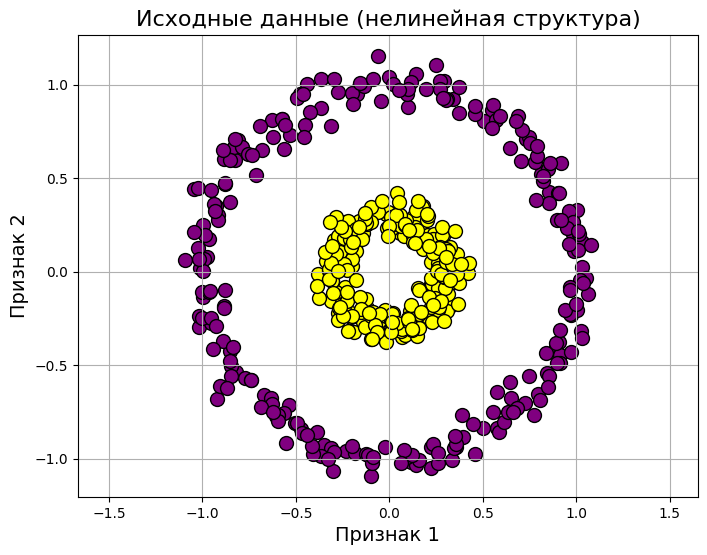

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='purple', edgecolor='k', s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='yellow', edgecolor='k', s=100)
plt.title('Исходные данные (нелинейная структура)', fontsize=16)
plt.xlabel('Признак 1', fontsize=14)
plt.ylabel('Признак 2', fontsize=14)
plt.axis('equal')
plt.grid()
plt.show()

Ядерный функции: 

In [42]:
kernels = ['linear', 'poly', 'rbf']

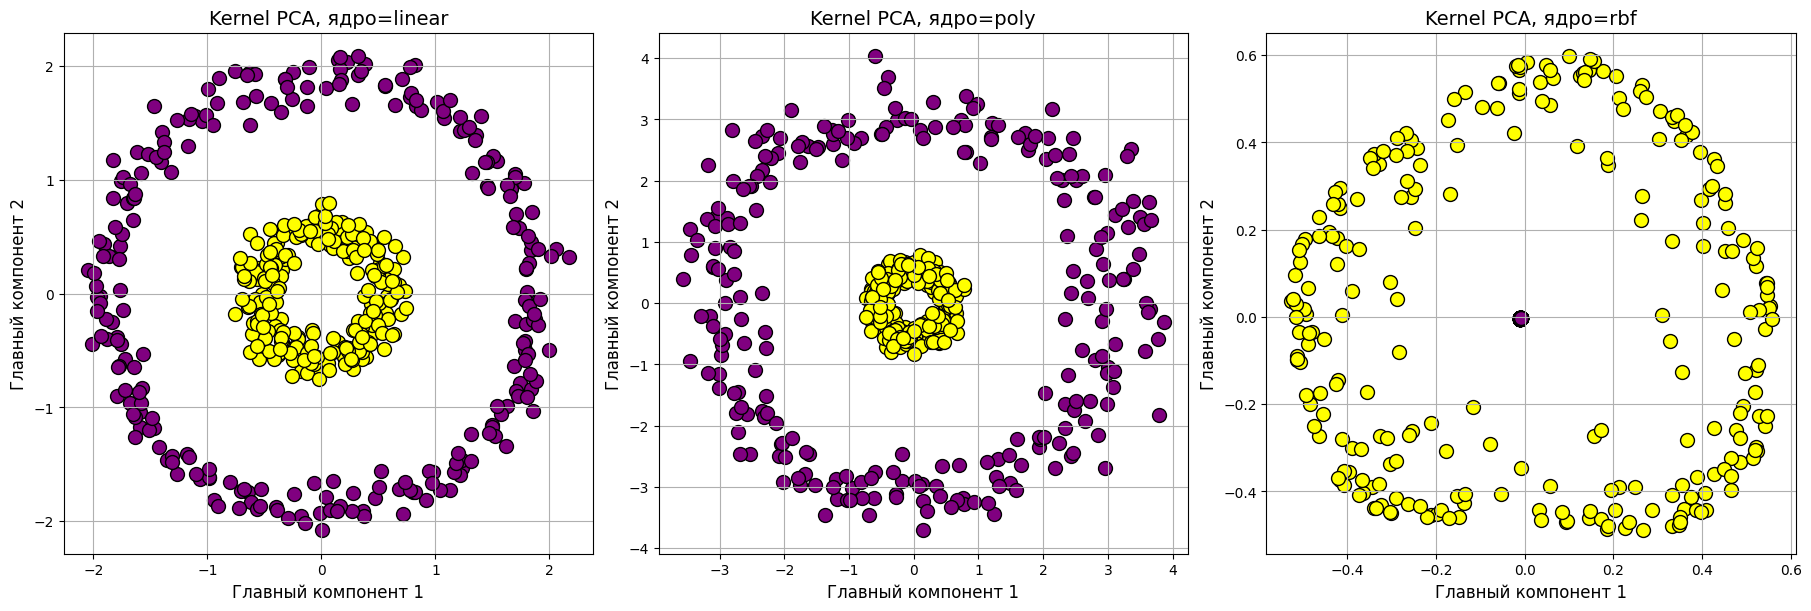

In [43]:
fig, axes = plt.subplots(1, len(kernels), figsize=(18, 6), constrained_layout=True)

for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)
    
    ax = axes[i]
    ax.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='purple', edgecolor='k', s=100)
    ax.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='yellow', edgecolor='k', s=100)
    ax.set_title(f'Kernel PCA, ядро={kernel}', fontsize=14)
    ax.set_xlabel('Главный компонент 1', fontsize=12)
    ax.set_ylabel('Главный компонент 2', fontsize=12)
    ax.grid()

plt.show()

In [44]:
gamma_values = [0.1, 1, 10.0]

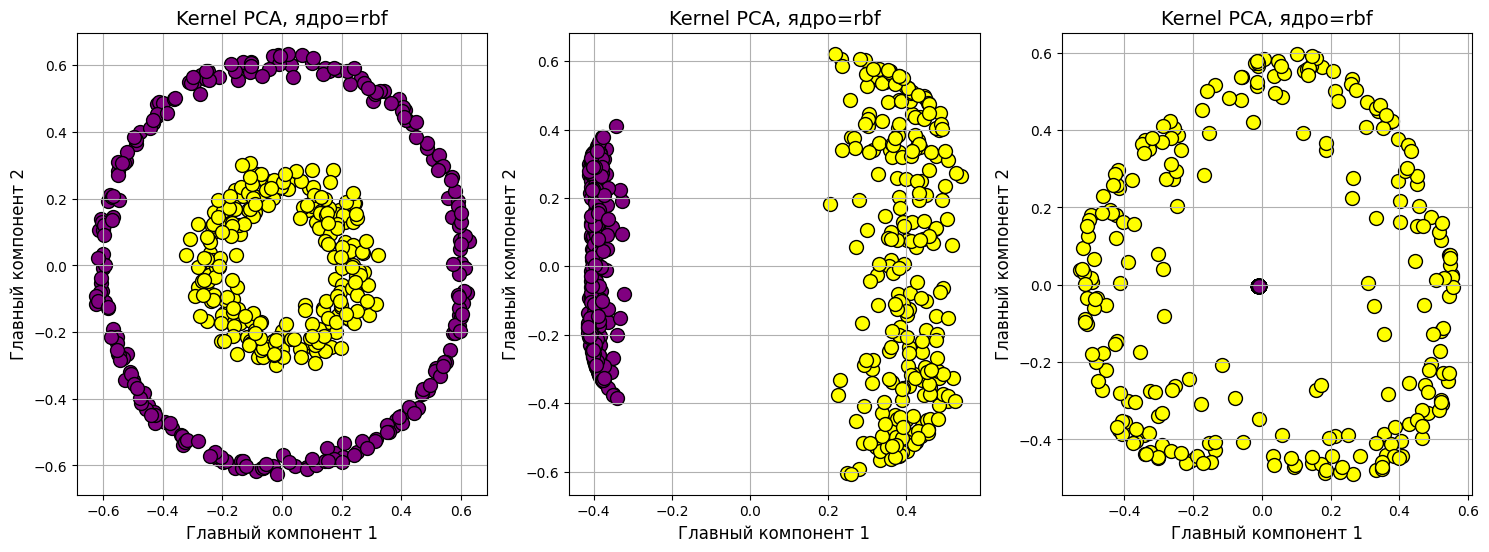

In [45]:
fig, axes = plt.subplots(1, len(gamma_values), figsize=(18, 6))

for i, gamma_values in enumerate(gamma_values):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma_values)
    X_kpca = kpca.fit_transform(X_scaled)
    
    ax = axes[i]
    ax.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='purple', edgecolor='k', s=100)
    ax.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='yellow', edgecolor='k', s=100)
    ax.set_title(f'Kernel PCA, ядро={kernel}', fontsize=14)
    ax.set_xlabel('Главный компонент 1', fontsize=12)
    ax.set_ylabel('Главный компонент 2', fontsize=12)
    ax.grid()

plt.show()